In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
def c(n, k):
    return math.factorial(n) // (math.factorial(k) * math.factorial(n - k))


# проверяет, что граница Хемминга выполняется для данных n, k, d
def check_hamming(n, k, d):
    t = (d - 1) // 2
    total_sum = 0
    for i in range(t + 1):
        total_sum += c(n, i)
    return total_sum <= 2 ** (n - k)


# проверяет, что граница Варшамова-Гилберта выполняется для данных n, k, d
def check_hilbert(n, k, d):
    total_sum = 0
    for i in range(d - 1):
        total_sum += c(n - 1, i)
    return total_sum < 2 ** (n - k)


# последовательным перебором ищет значение d для данных n, k и границы
def find_border(n, k, border_checker): 
    cur_d = 1
    while True:
        if not border_checker(n, k, cur_d):
            return cur_d - 1
            break
        else:
            cur_d += 1

In [3]:
ns = list(range(8, 41, 2))
ks = [n / 2 for n in ns]
ds = [4, 4, 4, 4, 5, 6, 6, 7, 8, 7, 8, 8, 8, 8, 8, 9, 10]

assert len(ds) == len(ns) and len(ns) == len(ks)

In [4]:
hammings = []
hilberts = []

for n, k in zip(ns, ks):
    d_hamming = find_border(n, k, check_hamming)
    d_hilbert = find_border(n, k, check_hilbert)
    
    hammings.append(d_hamming)
    hilberts.append(d_hilbert)

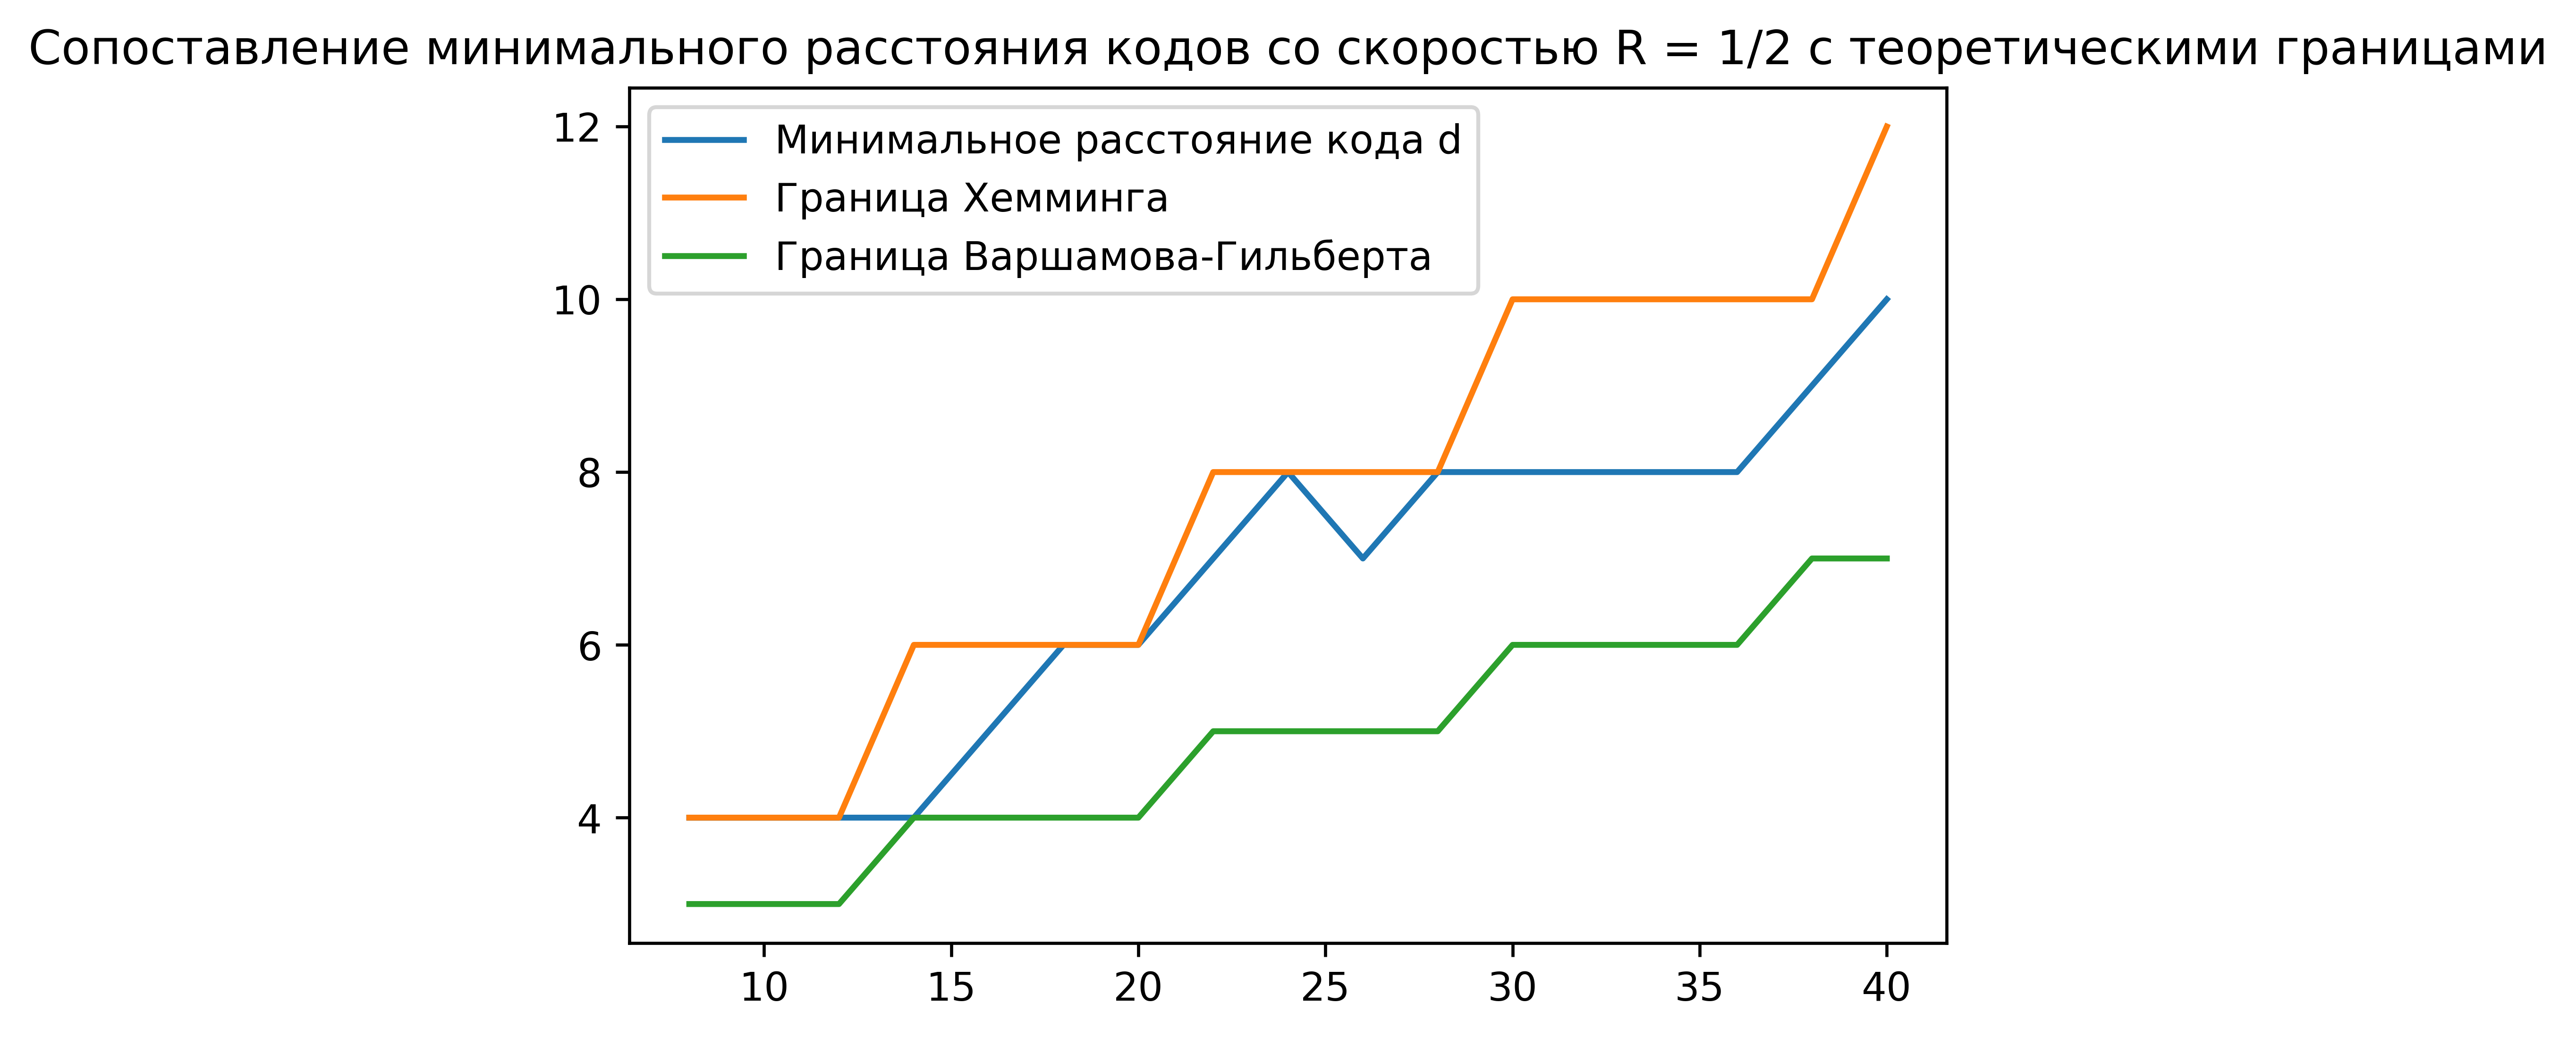

In [8]:
plt.figure(dpi=600)
plt.plot(ns, ds, label='Минимальное расстояние кода d')
plt.plot(ns, hammings, label='Граница Хемминга')
plt.plot(ns, hilberts, label='Граница Варшамова-Гильберта')
plt.legend(loc='upper left')
plt.title('Сопоставление минимального расстояния кодов со скоростью R = 1/2 с теоретическими границами')
plt.show()